In [362]:
import numpy
import pandas
from n2lite import n2lite
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.facecolor'] = 'white'

In [363]:
beam1 = '5l'
beam2 = '4r'
beam = [beam1, beam2]

fn_hot = '20181114'
fn_cold = '20181111_184309'

path_hot = '/home/amigos/data/sql/sisv_sweep/' + fn_hot + '/param.db'
path_cold = '/home/amigos/data/sql/sisv_sweep/' + fn_cold + '/param.db'

In [364]:
_hot = n2lite.N2lite(path_hot)
_cold = n2lite.N2lite(path_cold)
hot = _hot.read_pandas_all()
cold = _cold.read_pandas_all()

In [365]:
# param

initial_voltage = 6.
final_voltage = 9.
step = 0.05
roop = int((final_voltage - initial_voltage) / step) + 1

In [366]:
bins = numpy.arange(initial_voltage - step, final_voltage + step, step)

def set_flag(x):
    if x < bins[0]:return-1
    for i in range(len(bins)-1):
        if x >= bins[i] and x < bins[i+1]:return i
        continue
    return len(bins)

In [367]:
# set_flag

hot['pm1_flag'] = hot['sis_vol_'+beam1].apply(set_flag)
hot['pm2_flag'] = hot['sis_vol_'+beam2].apply(set_flag)
cold['pm1_flag'] = cold['sis_vol_'+beam1].apply(set_flag)
cold['pm2_flag'] = cold['sis_vol_'+beam2].apply(set_flag)
hot = hot[hot['pm1_flag'] != -1][hot['pm2_flag'] != -1]
cold = cold[cold['pm1_flag'] != -1][cold['pm2_flag'] != -1]

/home/amigos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/amigos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [368]:
# groupby

hot1_groupby = hot.groupby('pm1_flag')
cold1_groupby = cold.groupby('pm1_flag')
hot1_mean = hot1_groupby.mean()
cold1_mean = cold1_groupby.mean()
hot2_groupby = hot.groupby('pm2_flag')
cold2_groupby = cold.groupby('pm2_flag')
hot2_mean = hot2_groupby.mean()
cold2_mean = cold2_groupby.mean()

In [369]:
# plot param

vol1_hot = hot1_mean['sis_vol_{}'.format(beam1)]
vol2_hot = hot2_mean['sis_vol_{}'.format(beam2)]
cur1_hot = hot1_mean['sis_cur_{}'.format(beam1)]
cur2_hot = hot2_mean['sis_cur_{}'.format(beam2)]
power1_hot = hot1_mean['power_1'.format(beam1)]
power2_hot = hot2_mean['power_2'.format(beam2)]

vol1_cold = cold1_mean['sis_vol_{}'.format(beam1)]
vol2_cold = cold2_mean['sis_vol_{}'.format(beam2)]
cur1_cold = cold1_mean['sis_cur_{}'.format(beam1)]
cur2_cold = cold2_mean['sis_cur_{}'.format(beam2)]
power1_cold = cold1_mean['power_1'.format(beam1)]
power2_cold = cold2_mean['power_2'.format(beam2)]

vol_hot = numpy.array([vol1_hot, vol2_hot])
cur_hot = numpy.array([cur1_hot, cur2_hot])
power_hot = numpy.array([power1_hot, power2_hot])
vol_cold = numpy.array([vol1_cold, vol2_cold])
cur_cold = numpy.array([cur1_cold, cur2_cold])
power_cold = numpy.array([power1_cold, power2_cold])

In [370]:
print(len(cur2_hot))

53


In [371]:
print(len(vol_cold[0]))
print(len(power_cold[0]))

48
48


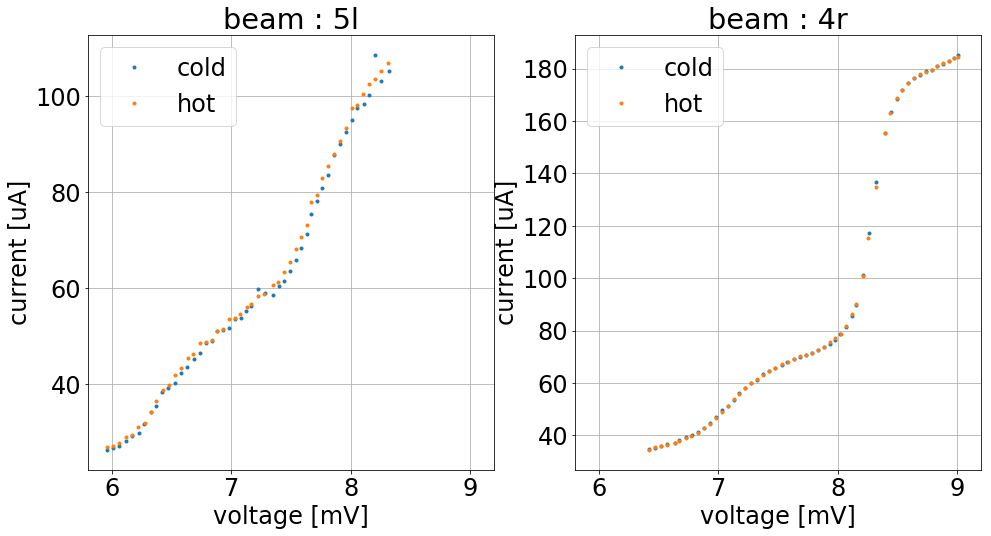

In [372]:
ncol = 2
nrow = 1
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _vol_hot, _cur_hot, _vol_cold, _cur_cold, _hot, _cold, _beam in zip(ax, vol_hot, cur_hot, vol_cold, cur_cold, power_hot, power_cold, beam):
    _ax.plot(_vol_cold, _cur_cold, '.', label='cold')
    _ax.plot(_vol_hot, _cur_hot, '.', label='hot')    
    _ax.grid()
    _ax.set_xlabel('voltage [mV]')
    _ax.set_ylabel('current [uA]')
    _ax.set_xlim(5.8, 9.2)    
    _ax.legend()
    _ax.set_title('beam : {}'.format(_beam))    

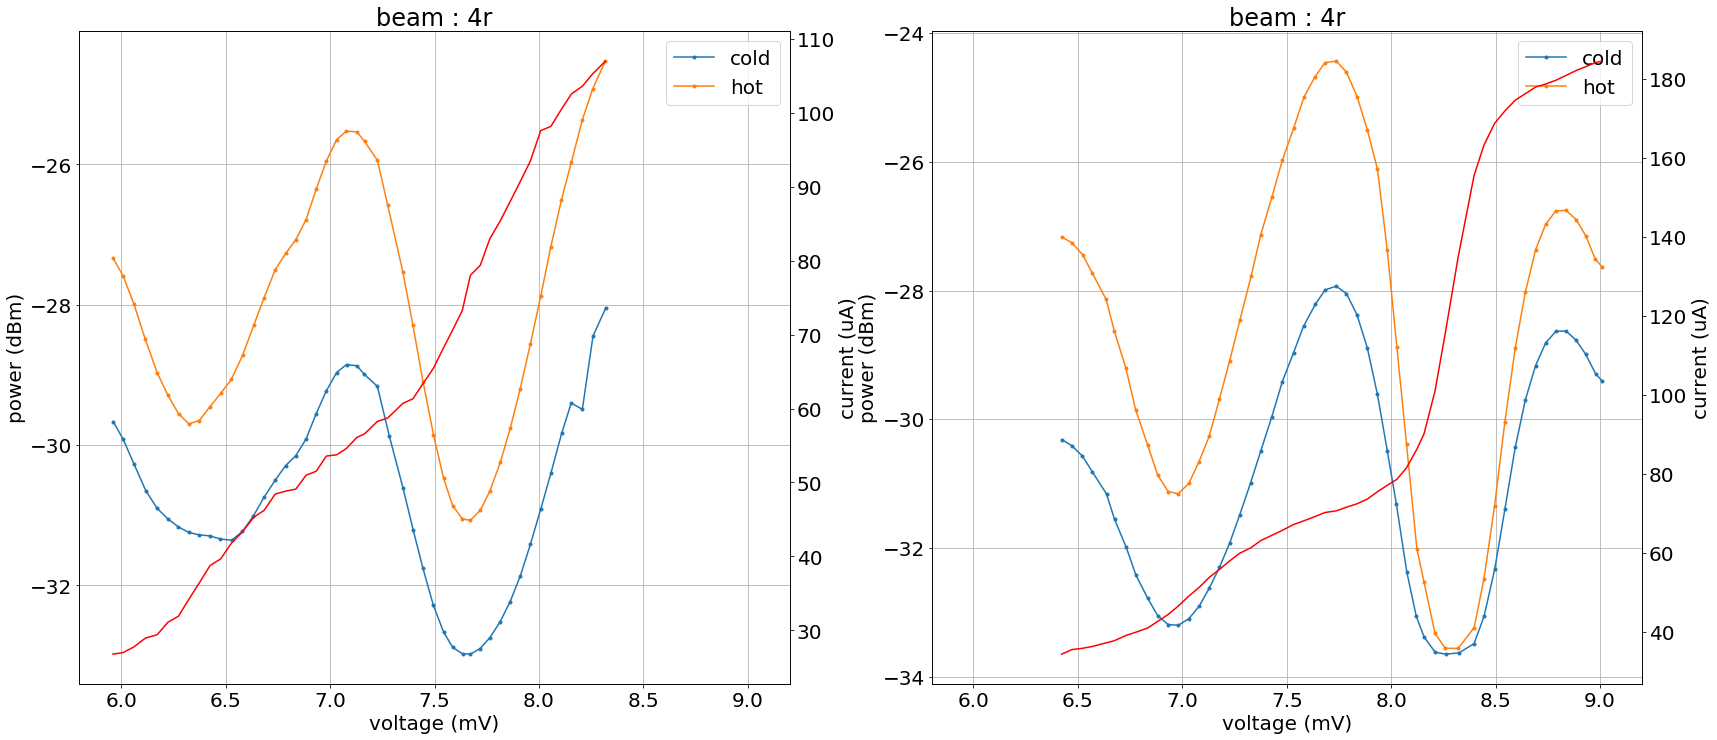

In [373]:
ncol = 2
nrow = 1
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 20

figsize = (ncol * 14, nrow * 12)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]
ax1 = [_ax.twinx() for _ax in ax]

for _ax, _ax1, _vol_hot, _cur_hot, _vol_cold, _cur_cold, _hot, _cold, in zip(ax, ax1, vol_hot, cur_hot, vol_cold, cur_cold, power_hot, power_cold):
    _ax.plot(_vol_cold, _cold, '.-', label='cold')
    _ax.plot(_vol_hot, _hot, '.-', label='hot')
    _ax1.plot(_vol_hot, _cur_hot, color='red')
    _ax.grid()
    _ax.set_xlabel('voltage (mV)')
    _ax.set_ylabel('power (dBm)')
    _ax1.set_ylabel('current (uA)')
    _ax.set_xlim(5.8, 9.2)
    _ax.legend()
    _ax.set_title('beam : {}'.format(_beam))    

In [374]:
Tcold = 77
Thot = 300
y = power_hot - power_cold
HOT = 10 ** (power_hot/10)
COLD = 10 ** (power_cold/10)
Y = 10 ** (y/10)
Trx = (Tcold * Y - Thot) / (1 - Y)

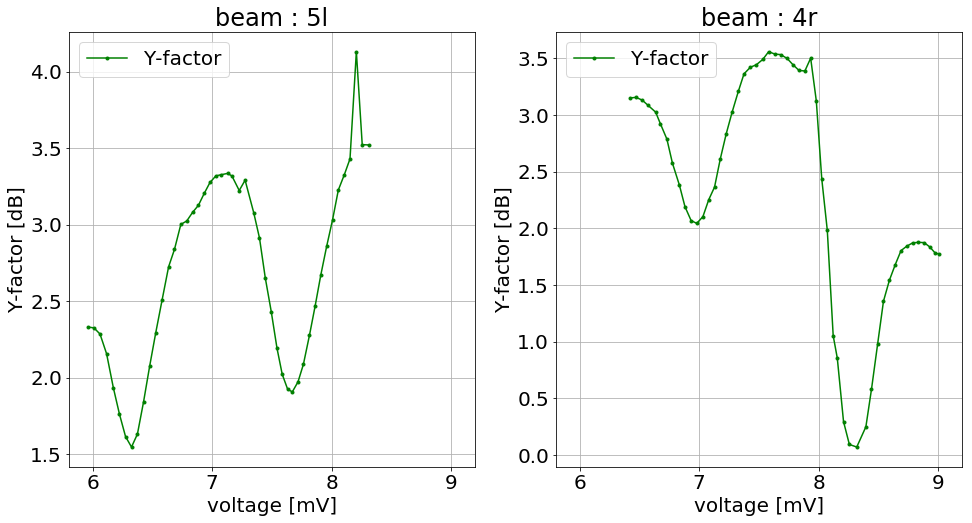

In [375]:
ncol = 2
nrow = 1
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 20

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]
# ax1 = [_ax.twinx() for _ax in ax]

for _ax, _ax1, _vol_hot, _cur_hot, _vol_cold, _cur_cold, _y, _beam in zip(ax, ax1, vol_hot, cur_hot, vol_cold, cur_cold, y, beam):
    _ax.plot(_vol_hot, _y, '.-', color='green', label='Y-factor')
#     _ax1.plot(_vol_hot, _cur_hot)
    _ax.grid()
    _ax.set_xlabel('voltage [mV]')
    _ax.set_ylabel('Y-factor [dB]')
    _ax.set_xlim(5.8, 9.2)
    _ax.legend()
    _ax.set_title('beam : {}'.format(_beam))

In [376]:
# optimal

idx_minTrx = [numpy.argmin(_Trx) for _Trx in Trx ]
minTrx = [_Trx[_idx] for _Trx, _idx in zip(Trx, idx_minTrx)]
optimam_voltage = [_hot_vol[_idx] for _hot_vol, _idx in zip(vol_hot, idx_minTrx)]

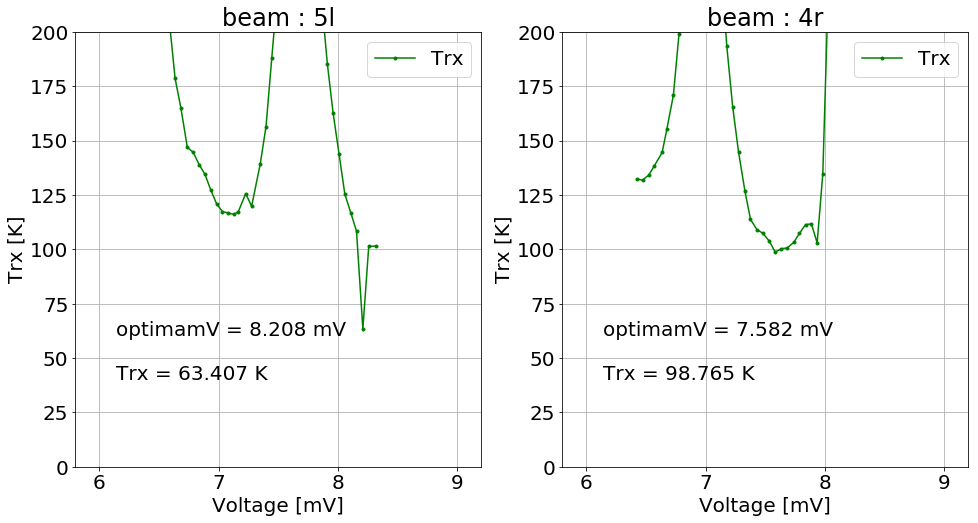

In [377]:
ncol = 2
nrow = 1
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 20

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]
# ax1 = [_ax.twinx() for _ax in ax]

for _ax, _ax1, _vol_hot, _cur_hot, _vol_cold, _cur_cold, _Trx, _beam in zip(ax, ax1, vol_hot, cur_hot, vol_cold, cur_cold, Trx, beam):
    _ax.plot(_vol_hot, _Trx, '.-', color='green', label='Trx')
    _ax1.plot(_vol_hot, _cur_hot)
    _ax.grid()
    _ax.set_xlabel('Voltage [mV]')
    _ax.set_ylabel('Trx [K]')
    _ax.set_xlim(5.8, 9.2)
    _ax.set_ylim(0, 200)
    _ax.set_title('beam : {}'.format(_beam))
    _ax.legend()
    
[_ax.text(0.1, 0.2, 'optimamV = {0:.3f} mV\n\nTrx = {1:.3f} K'.format(_optV, mTrx), transform=_ax.transAxes) 
 for _ax, _optV, mTrx in zip(ax, optimam_voltage, minTrx)]

plt.show()